# Виды распределений

Загрузить таблицу и построить график распределений. Найти нормальное распределение.

In [1]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns

%matplotlib inline

Таблица цен на дома в Бостоне

Основные значения:

* CRIM: This is the per capita crime rate by town
* ZN: This is the proportion of residential land zoned for lots larger than 25,000 sq.ft.
* INDUS: This is the proportion of non-retail business acres per town.
* CHAS: This is the Charles River dummy variable (this is equal to 1 if tract bounds river; 0 otherwise)
* NOX: This is the nitric oxides concentration (parts per 10 million)
* RM: This is the average number of rooms per dwelling
* AGE: This is the proportion of owner-occupied units built prior to 1940
* DIS: This is the weighted distances to five Boston employment centers
* RAD: This is the index of accessibility to radial highways
* TAX: This is the full-value property-tax rate per 10,000 dollars
* PTRATIO: This is the pupil-teacher ratio by town
* B: This is calculated as 1000(Bk — 0.63)², where Bk is the proportion of people of African American descent by town
* LSTAT: This is the percentage lower status of the population
* MEDV: This is the median value of owner-occupied homes in 1000 dollars

In [2]:
url='http://yustiks.ru/housing.csv'
s=requests.get(url).content
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data=pd.read_csv(io.StringIO(s.decode('utf-8')),  delim_whitespace=True, names=names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Нарисовать частотные графики для всех значений. Можете ли вы найти следующие распределения в данных графиках?


1.   Нормальное
2.   Равномерное
3.   Биноминальное
4.   Бернулли
5.   Геометрическое
6.   Логнормальное



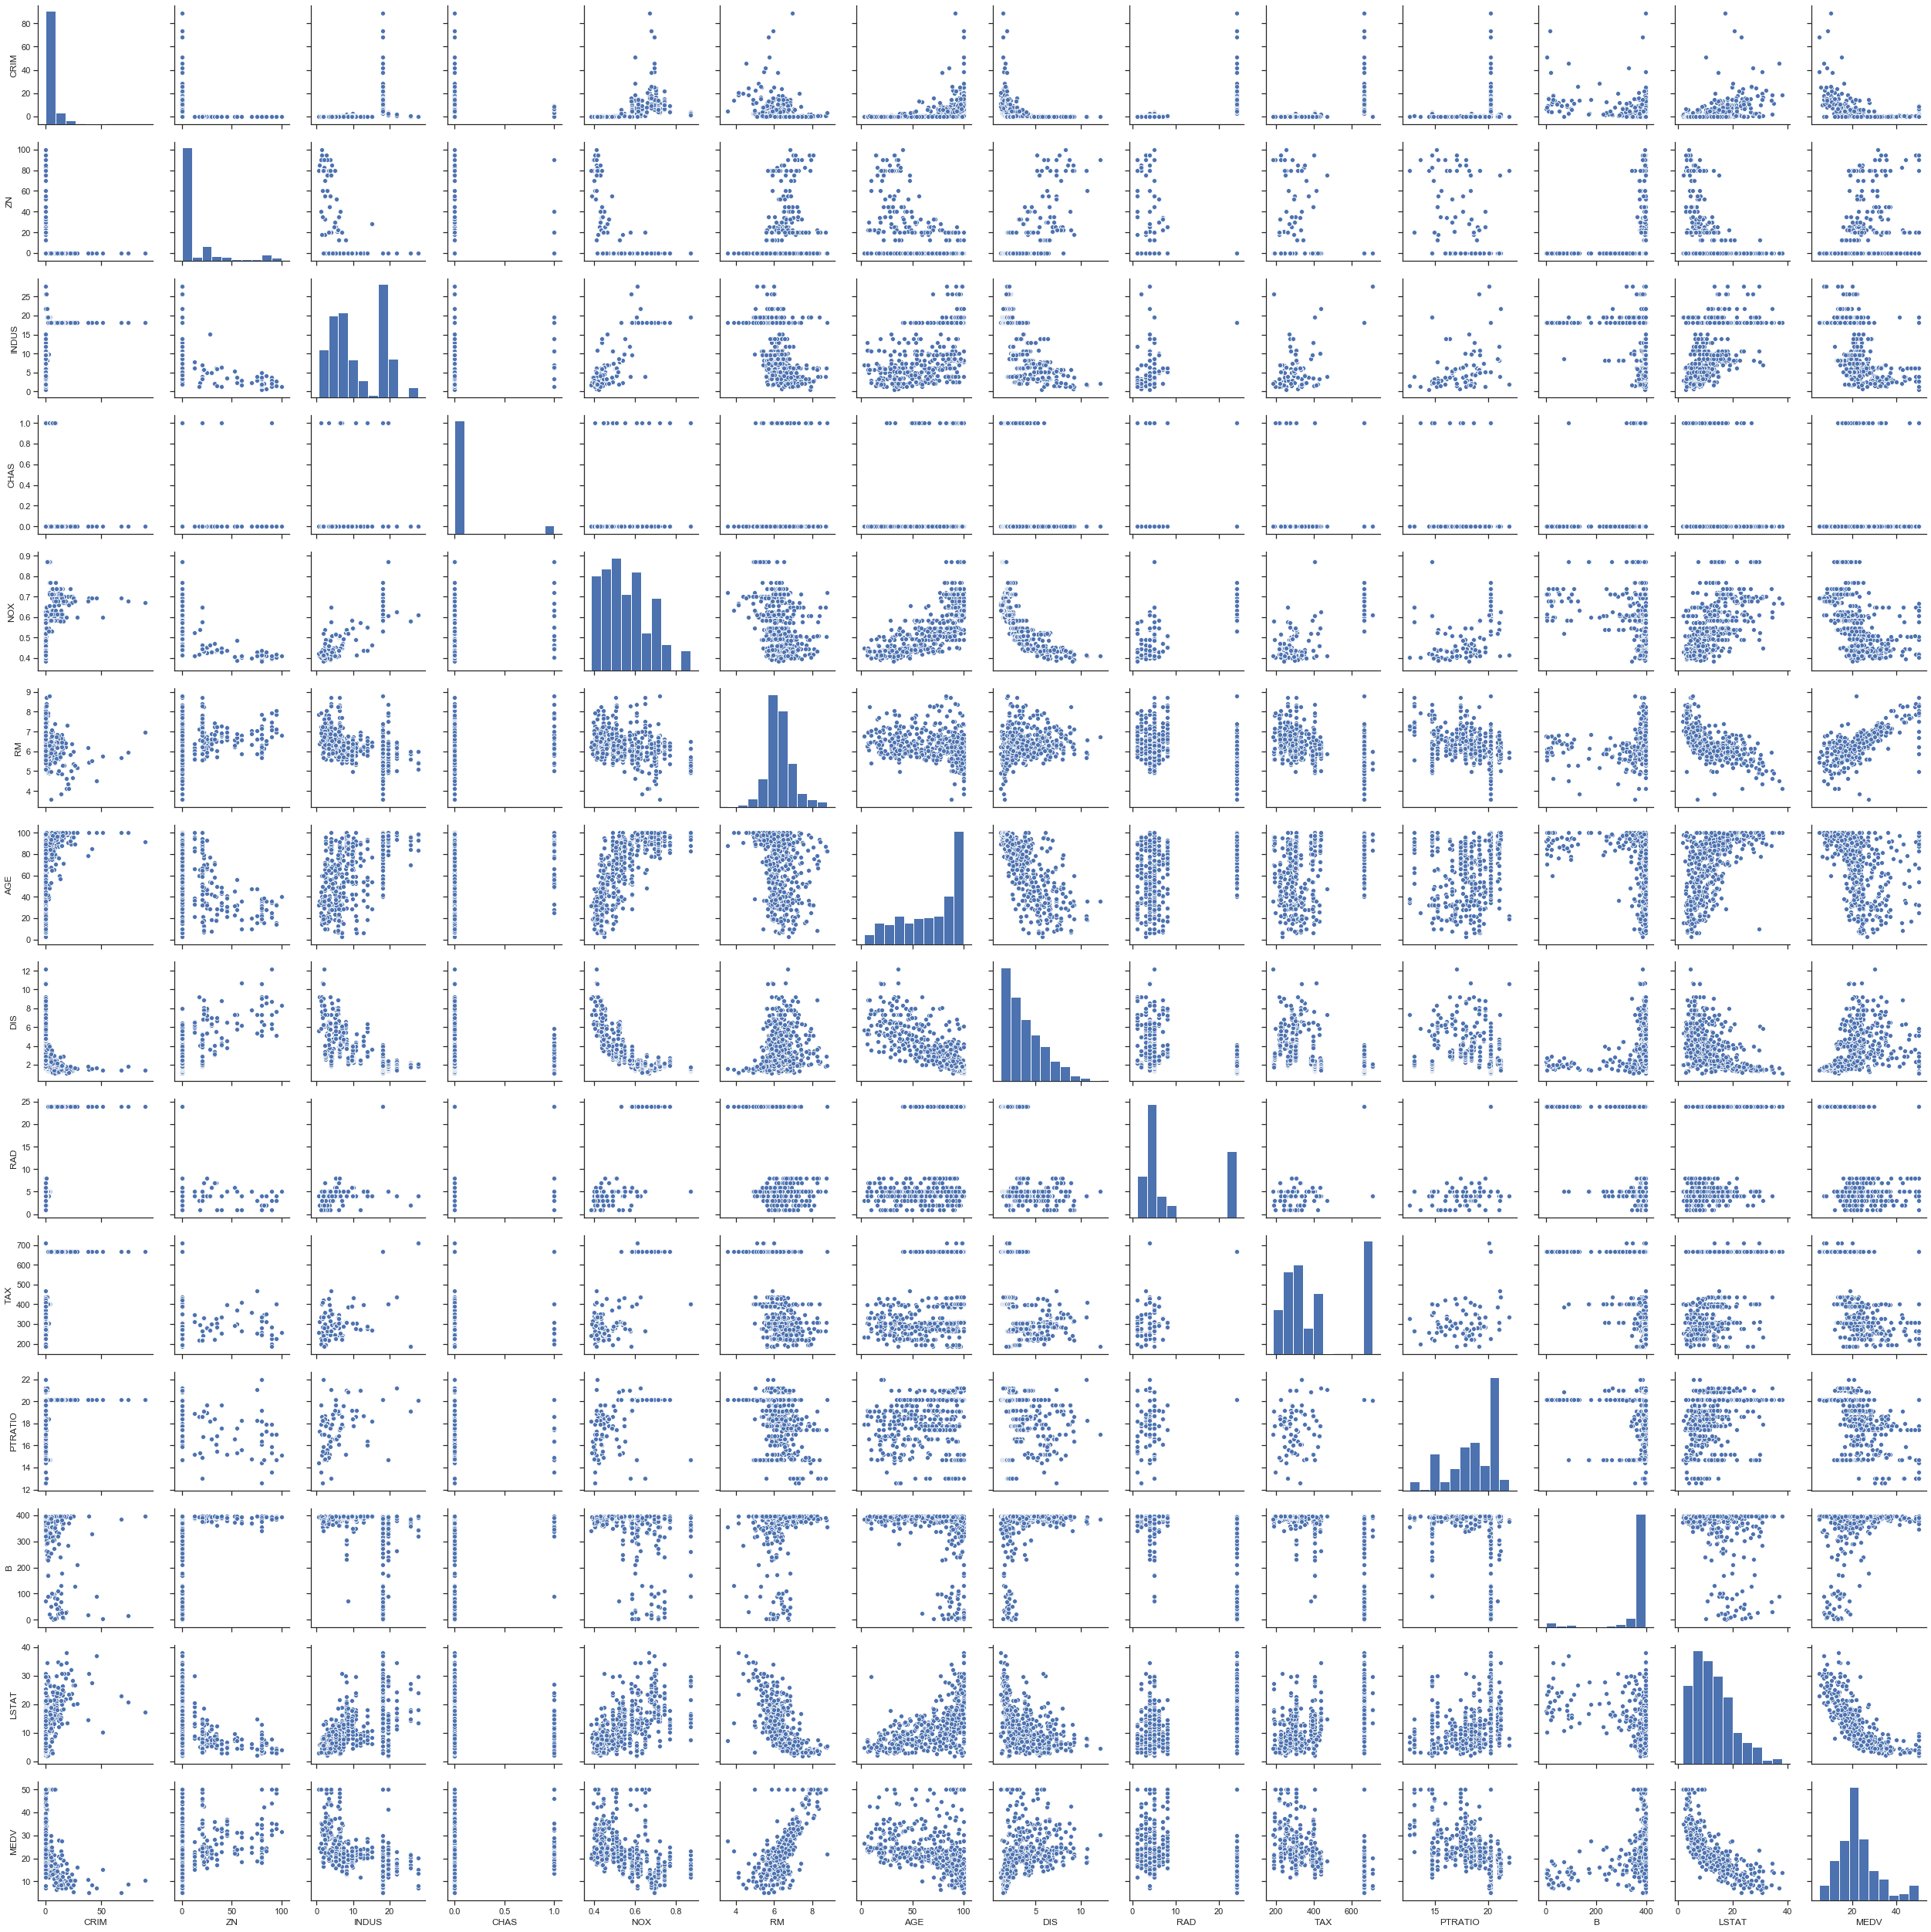

In [3]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(data)

In [6]:
data.shape
# Нормальное - RM. С учетом малой выборки, моржно считать, что случайная величина имеет t-распределению Стьюдента
    # а есть еще MEDV, график которого похож на нормальное распределение с некоторыми выбросами в районе значения по 
    #оси абсции 50. При этом RM явно коррелирует с RM
# Равномерное - нет такой СВ
# Биноминальное - возможно, RAD. Однако, есть часть значений, не соотвествующих такому распределение. Возможно,
    #этому есть объективная причина (принадлежность всех наблюдений к какой-либо категории)
# Бернулли - CHAS
# Геометрическое - CRIM, DIS
# Логнормальное - LSTAT

(506, 14)

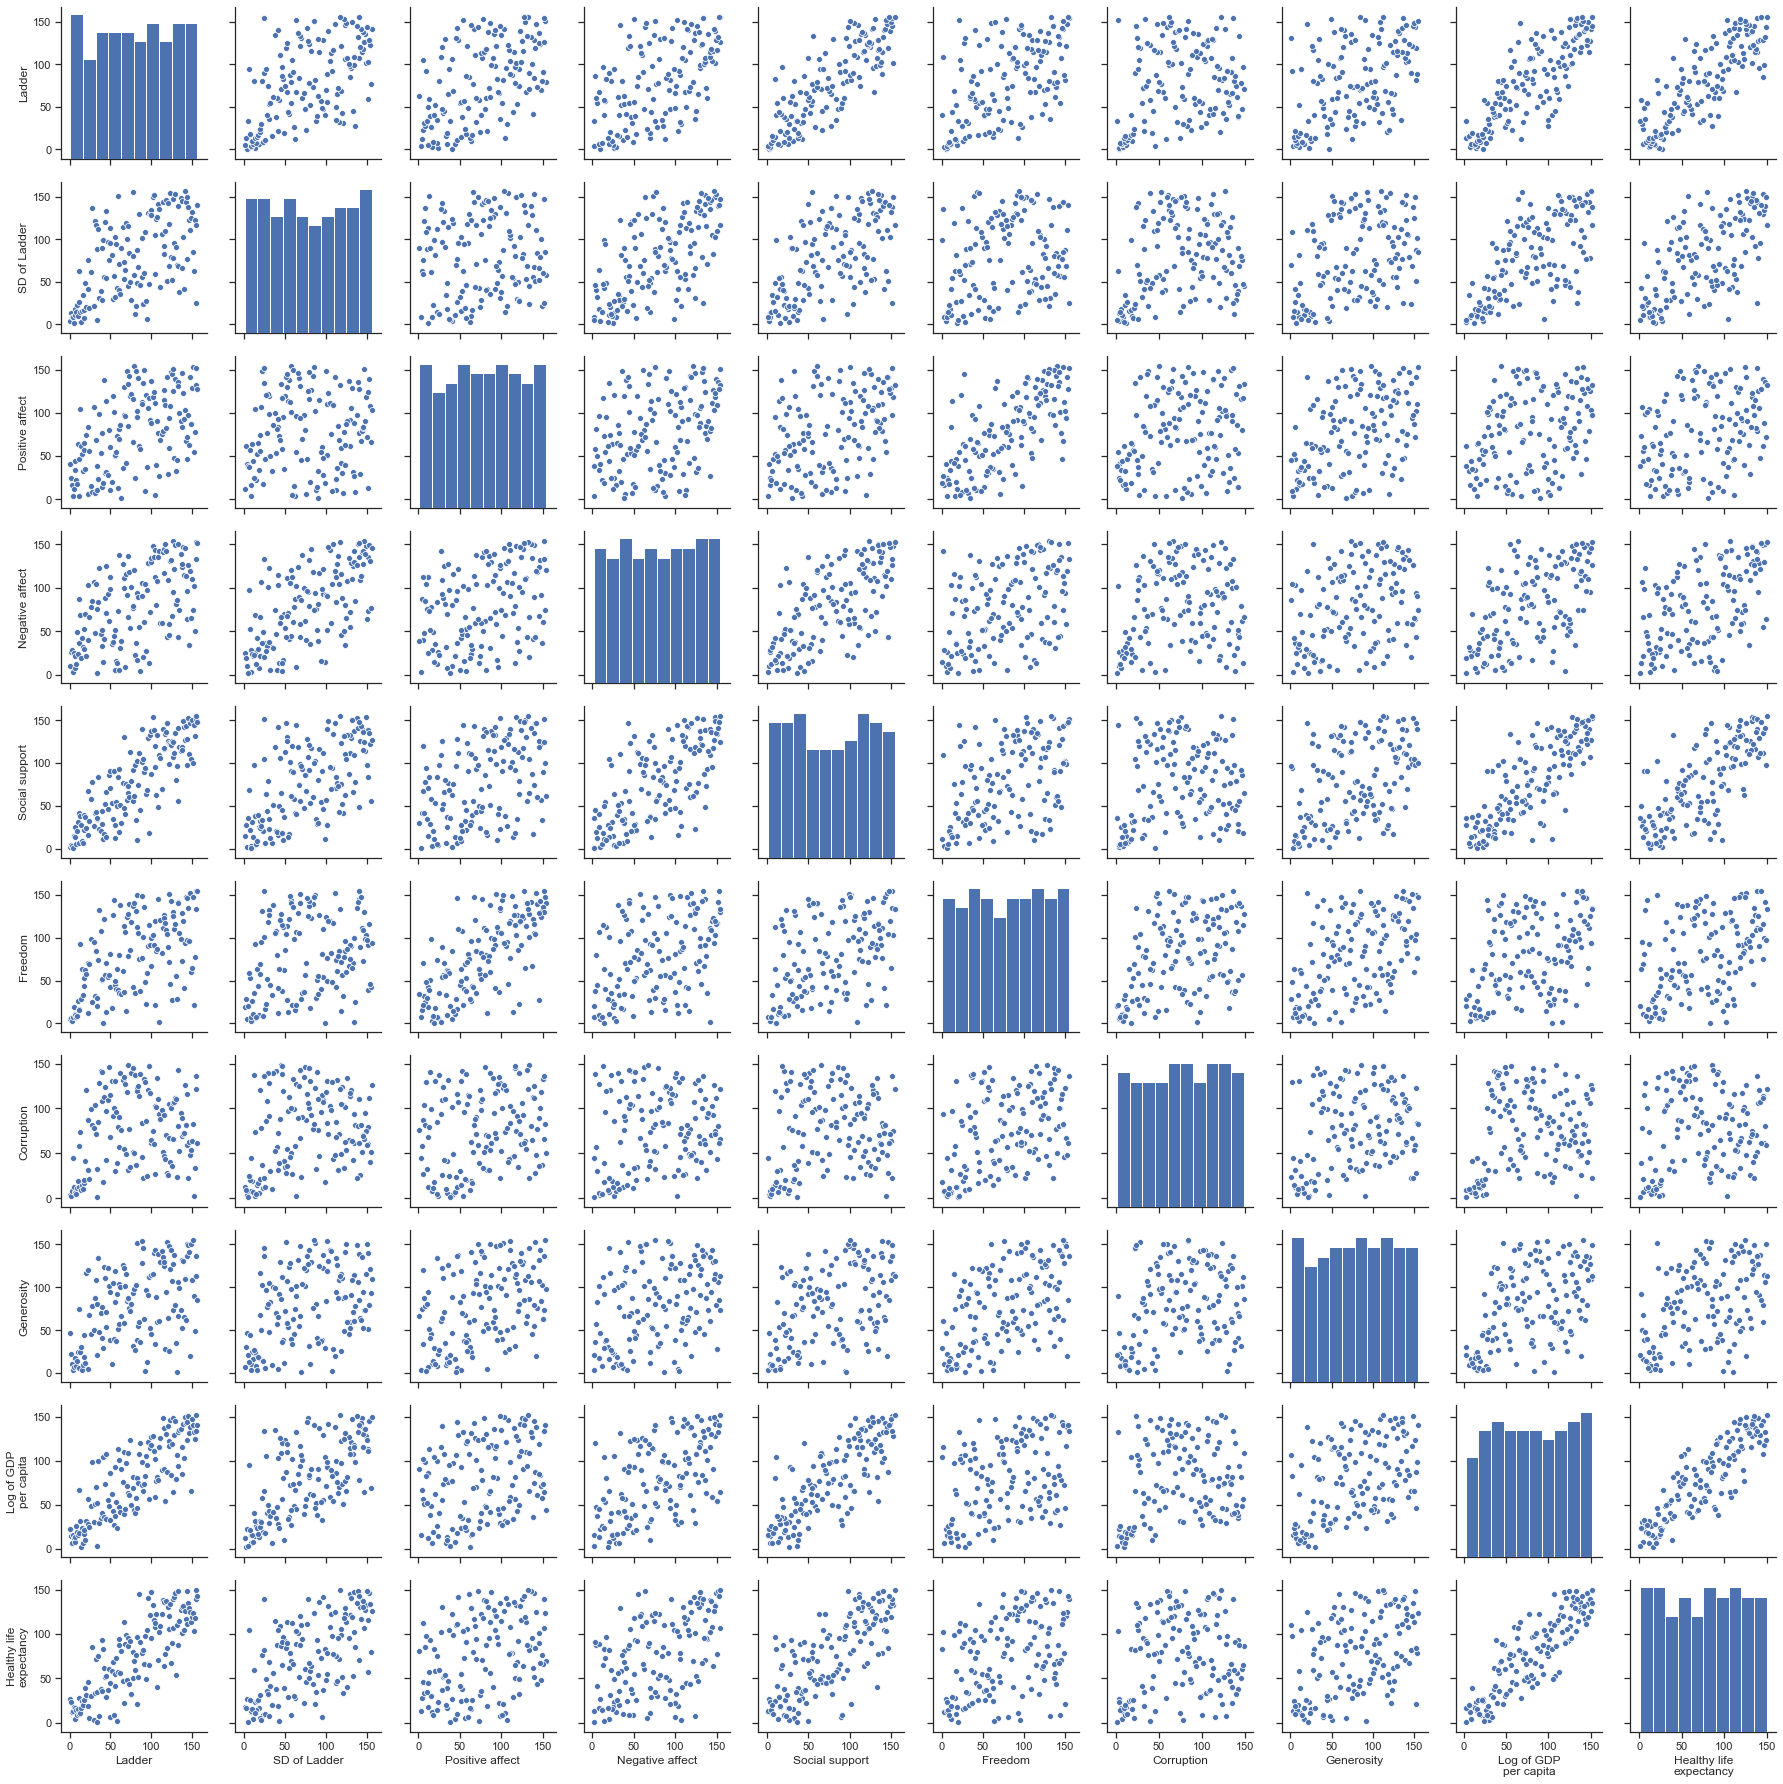

In [11]:
# Напишите код, который будет рисовать распределения попарно - точечные распределение
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url).dropna()
# df.head()
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(df)

Загрузить таблицу Happiness report. Нарисовать матрицу ковариаций попарно. 

In [12]:
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
data=pd.read_csv(url)
data.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


Сколько в данной таблице отсутствующих значений? Написать ответ. Если есть отсутствующие значения в выборке country, убрать (drop). Написать код.

In [16]:
print(len(data) - len(data.dropna()), 'отсутствующих значений')

16 отсутствующих значений


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 11 columns):
Country (region)           156 non-null object
Ladder                     156 non-null int64
SD of Ladder               156 non-null int64
Positive affect            155 non-null float64
Negative affect            155 non-null float64
Social support             155 non-null float64
Freedom                    155 non-null float64
Corruption                 148 non-null float64
Generosity                 155 non-null float64
Log of GDP
per capita      152 non-null float64
Healthy life
expectancy    150 non-null float64
dtypes: float64(8), int64(2), object(1)
memory usage: 13.5+ KB


В country нет отсутствующих значений.

Сколько стран в выборке? Написать ответ. Можно ли сказать, что данные значения - это **проблема классификации**?

In [31]:
len(data['Country (region)'].unique()) #156 уникальных стран, то есть повторяющихся значений нет

156

Нарисовать sns.pairplot для класс - страна. Из графика сделать вывод о том, какие страны похожи.

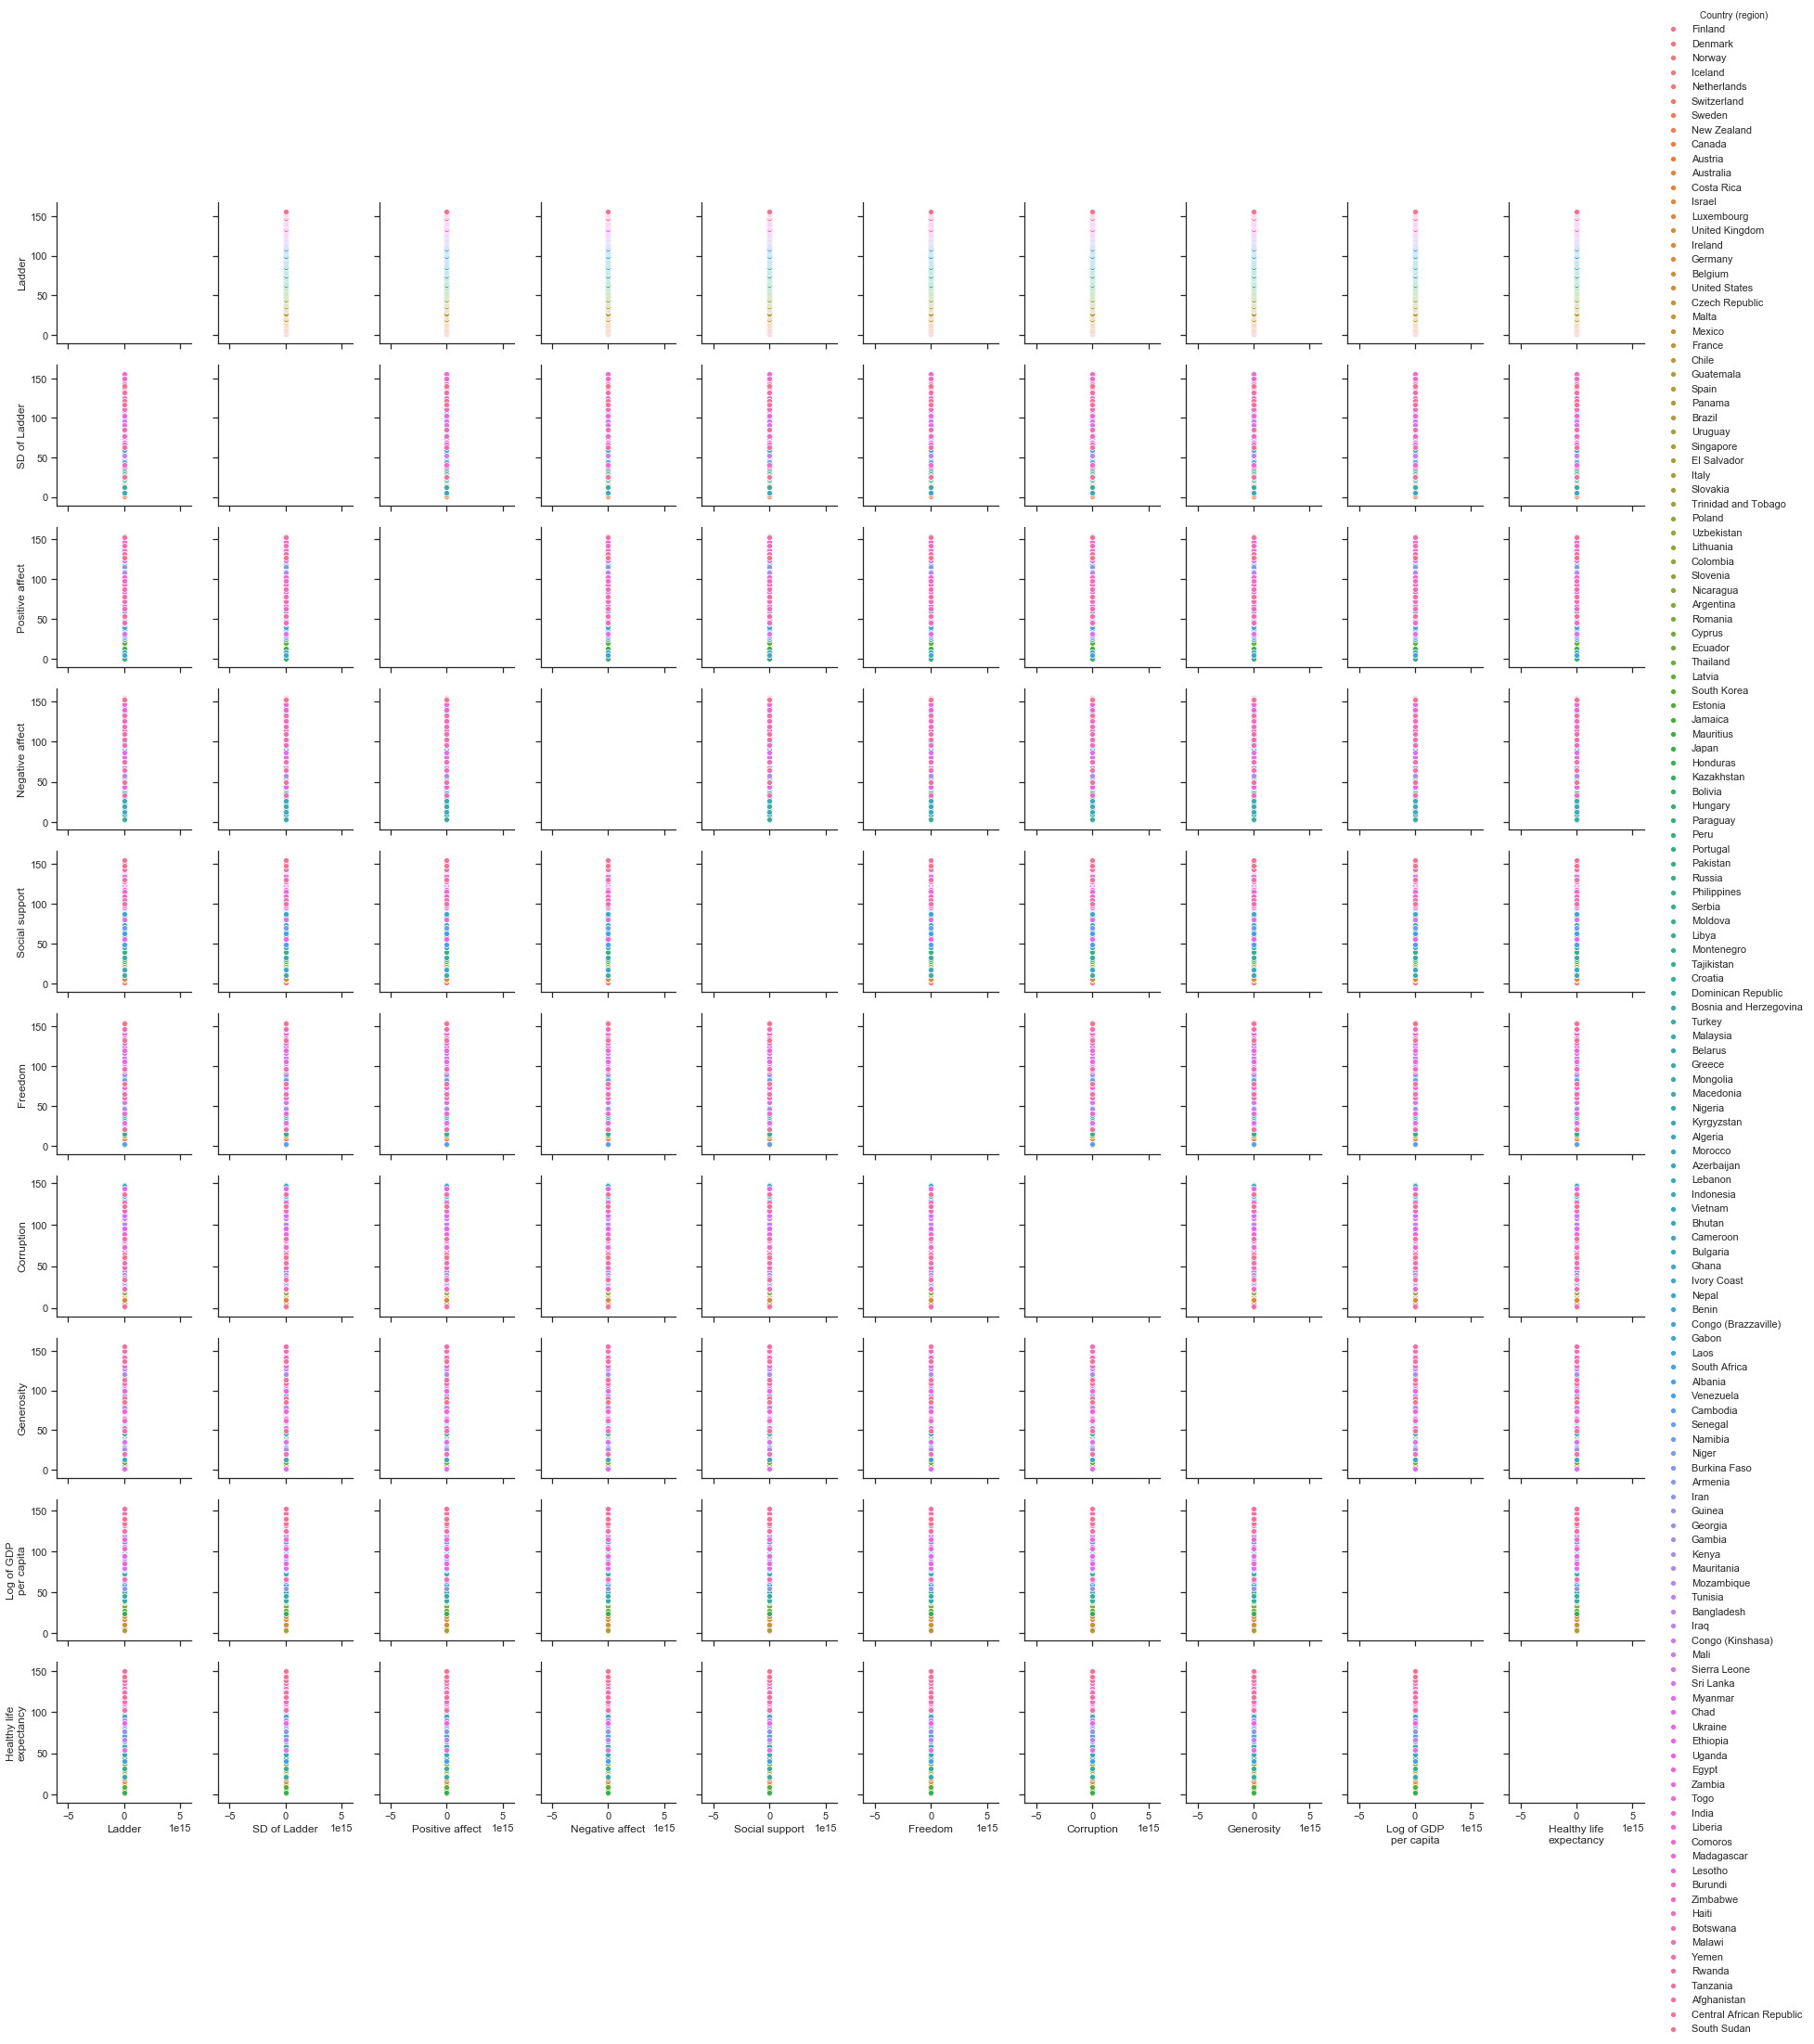

In [33]:
# Если код ниже не работает, измените код, используя материал лекций. Пишите на почту, если испытываете проблемы: yustiks@gmail.com
sns.set(style="ticks", color_codes=True)
fig = sns.pairplot(data=df, hue='Country (region)')
plt.show()

In [ ]:
'''по смыслу и по графику: некорректно строить корреляции внутри категорий, которые содержат только 1 значение. Т.е. нельзя
сказать что в датасете присуствует проблема классификации. 

При этом визуально можно сделать вывод о схожести стран по уровню развития: на одном полюсе (цвет - красно-розовый) страны 
"третьего мира": Судан, ЦАР, Афганистан, Танзания и проч. На другой стороне Финляндия, Дания, Норвегия и проч. На графиках 
прослеживается, что точки сгруппированы по цветам.
'''

Посчитать матрицу корреляций для таблицы. Написать код. Сделать график. Какие можно сделать выводы?

In [34]:
df.corr()

,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
Ladder,1.000000,0.555987,0.511870,0.539677,0.833412,0.546414,0.224394,0.485704,0.820608,0.826677
SD of Ladder,0.555987,1.000000,0.090332,0.632734,0.600087,0.250246,0.253344,0.386337,0.663977,0.637554
Positive affect,0.511870,0.090332,1.000000,0.351906,0.433333,0.696567,0.225905,0.417061,0.310843,0.339032
Negative affect,0.539677,0.632734,0.351906,1.000000,0.671387,0.415935,0.166472,0.350541,0.565756,0.507148
Social support,0.833412,0.600087,0.433333,0.671387,1.000000,0.478613,0.148890,0.448135,0.801898,0.755292
Freedom,0.546414,0.250246,0.696567,0.415935,0.478613,1.000000,0.407571,0.498226,0.385919,0.423949
Corruption,0.224394,0.253344,0.225905,0.166472,0.148890,0.407571,1.000000,0.281146,0.186140,0.148973
Generosity,0.485704,0.386337,0.417061,0.350541,0.448135,0.498226,0.281146,1.000000,0.459762,0.453135
Log of GDP\nper capita,0.820608,0.663977,0.310843,0.565756,0.801898,0.385919,0.186140,0.459762,1.000000,0.873628
Healthy life\nexpectancy,0.826677,0.637554,0.339032,0.507148,0.755292,0.423949,0.148973,0.453135,0.873628,1.000000


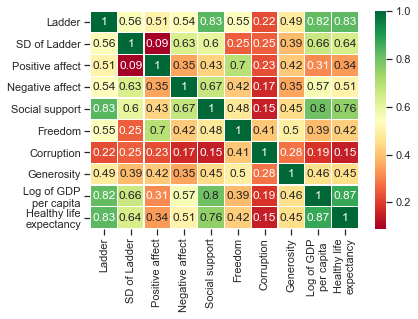

In [35]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
plt.show()
"""
На уровень удовлетворенности жизнью сильнее всего влияет (а точнее - статистически связаны величины) соц. обеспечение, 
продолжительность "здоровой жизни" и ВВП на душу населения.
"""

**Регрессионный анализ** - можно ли провести линейную зависимость между двумя выборками. Возьмем Ladder - удовлетворение жизнью, и generosity - доброта. Мы хотим найти прямую, которая разделит точки в пространстве наполовину. Это можно сделать графически. Нарисовать график. Можно ли сказать, что данная прямая является собственным вектором? При проецировании данных на эту прямую разброс данных максимален?

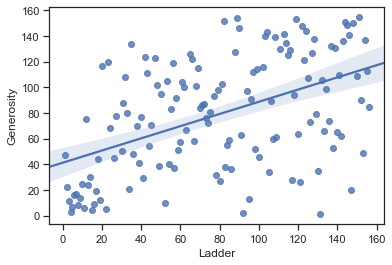

In [39]:
Ladder = df['Ladder']
Generosity = df['Generosity']
sns.regplot(x= Ladder, y=Generosity,data=df, fit_reg=True)
plt.grid(False)
plt.show()

In [ ]:
'''
Прямая линейной регрессии представляет собой предиктивный инструмент, поскольку строится по принципу наименьшей суммы 
нормалей, в то время как собственный вектор - инструмент описания матриц. 
'''

# Дискретное распределение случайной величины

Напишите код для моделирования 10 подбрасываний игрального кубика. Начертите диаграму histogram. Какое это распределение?

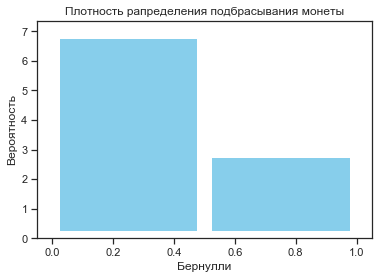

In [43]:
rng = np.random.RandomState(123)

coin_flips = rng.randint(0, 2, size=10)
ax= sns.distplot(coin_flips,
                 kde=False,
                 color="skyblue",
                 hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Бернулли', ylabel='Вероятность')
plt.title('Плотность рапределения подбрасывания монеты')
plt.show()
# распределение Бернулли

Напишите код для моделирования 1000 подбрасываний игрального кубика. Начертите диаграму histogram. Почему график изменился? Как применить центральную предельную теорему?

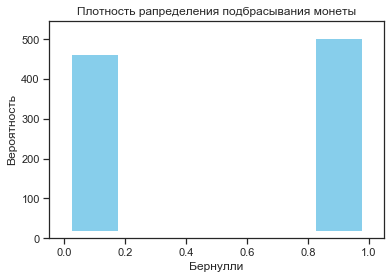

In [42]:
rng = np.random.RandomState(123)

coin_flips = rng.randint(0, 2, size=1000)
ax= sns.distplot(coin_flips,
                 kde=False,
                 color="skyblue",
                 hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Бернулли', ylabel='Вероятность')
plt.title('Плотность рапределения подбрасывания монеты')
plt.show()
'''
график изменился с ростом числа наблюдений.
ЦПТ утверждает, что что суммаслучайных величин (если они слабо зависимы и ни одна не доминирует по размеру), 
имеет распределение, близкое к нормальному.  Таким образом, если к данной СВ добавить достаточно большое количество 
СВ, то их распределенеие будет близко к нормальному
'''